In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns   
from datasets import load_dataset

ds=load_dataset('lukebarousse/data_jobs')
df=ds['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill : ast.literal_eval(skill) if pd.notna(skill) else skill)

In [2]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [4]:
df_DA_US['job_posted_month_no']=df_DA_US['job_posted_date'].dt.month

In [6]:
df_DA_US_explode=df_DA_US.explode('job_skills')

In [9]:
df_DA_US_pivot=df_DA_US_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)

In [10]:
df_DA_US_pivot.loc['Total']=df_DA_US_pivot.sum()

In [14]:
df_DA_US_pivot=df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

In [15]:
df_DA_US_pivot=df_DA_US_pivot.drop('Total')

In [19]:
DA_totals=df_DA_US.groupby('job_posted_month_no').size()

In [24]:
df_DA_US_percent=df_DA_US_pivot.div(DA_totals/100,axis=0)

In [ ]:
df_DA_US_percent=df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month']=df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
df_DA_US_percent=df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent=df_DA_US_percent.drop(columns='job_posted_month_no')

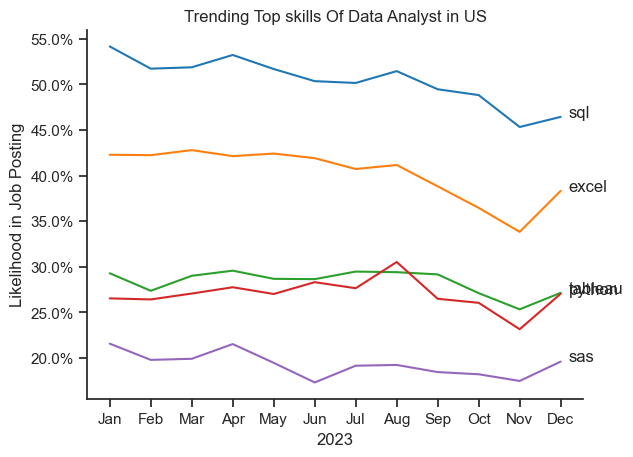

In [54]:
df_plot=df_DA_US_percent.iloc[:,:5]
sns.lineplot(data=df_plot,dashes=False,palette='tab10')
sns.set_theme(style='ticks')
sns.despine()
plt.title('Trending Top skills Of Data Analyst in US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())

for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i],df_plot.columns[i])
plt.show()
